### Importing Libraries

In [1]:
# basic operations
import numpy as np

# dataframe manipulation
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for missing values
import missingno as mno

# date time manipulation
import datetime

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# background style for plots
plt.style.use('fivethirtyeight')

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [3]:
# reading data and checking computation time
%time data = pd.read_csv('C:/Users/Dell/Desktop/data.csv')
print(data.shape)

Wall time: 337 ms
(18207, 89)


In [4]:
# check column names present in the data
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
# checking first five rows and columns
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# describe data for numerical columns
pd.set_option('max_columns',100)
data.iloc[:, 2:].describe().style.background_gradient(cmap='cividis')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
# check the descriprtive statistics for categorical columns
data.iloc[:, 13:].describe(include='object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


### Data Cleaning

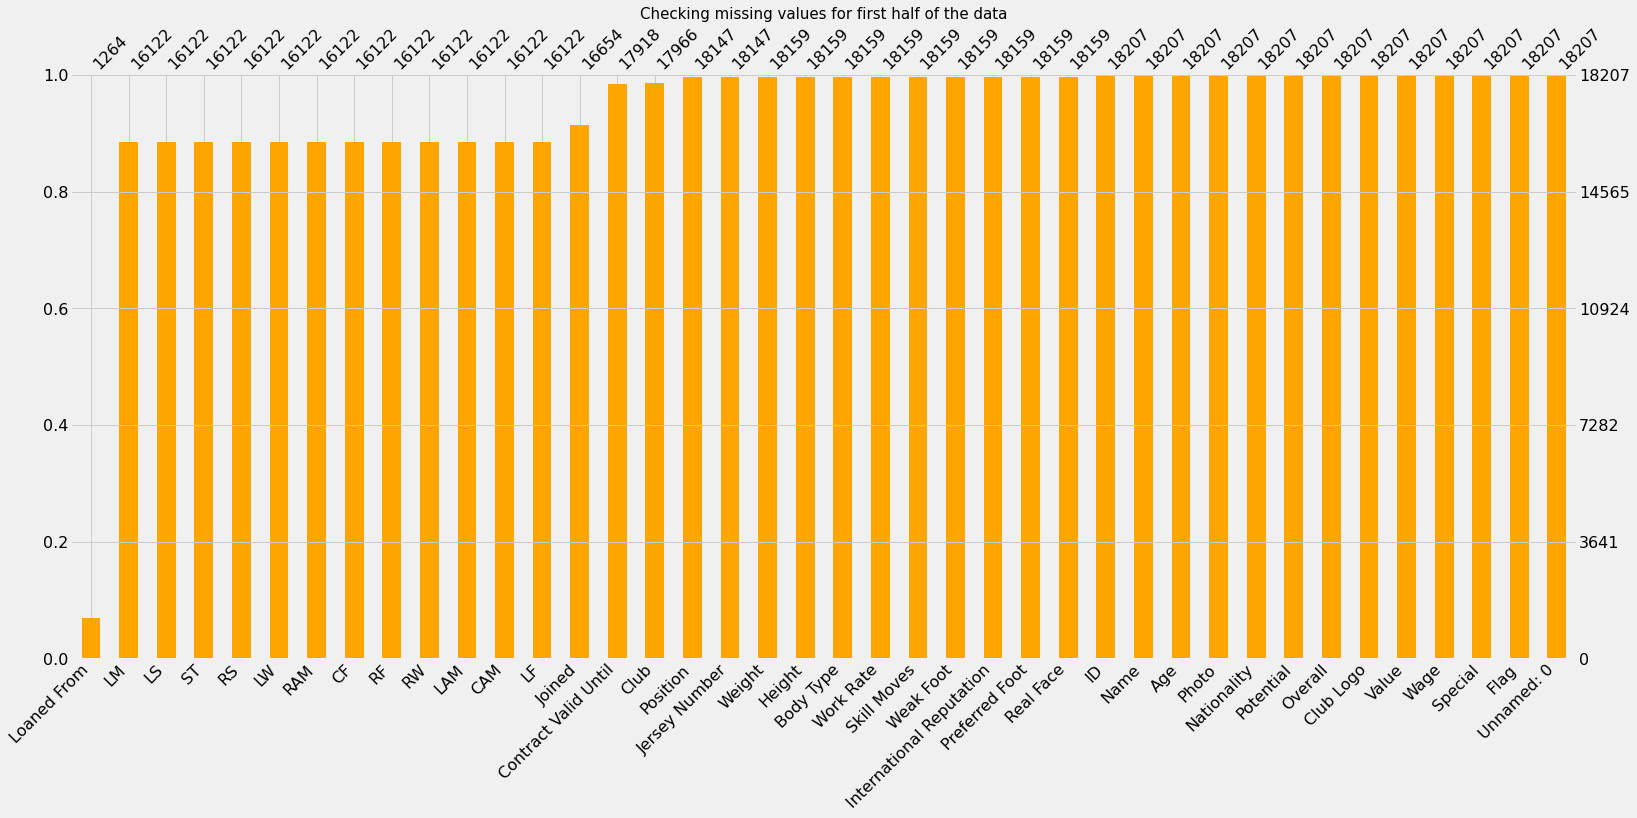

In [9]:
# visualize missing values
mno.bar(data.iloc[:, :40],color='orange',sort='ascending')
plt.title('Checking missing values for first half of the data', fontsize=15)
plt.show()

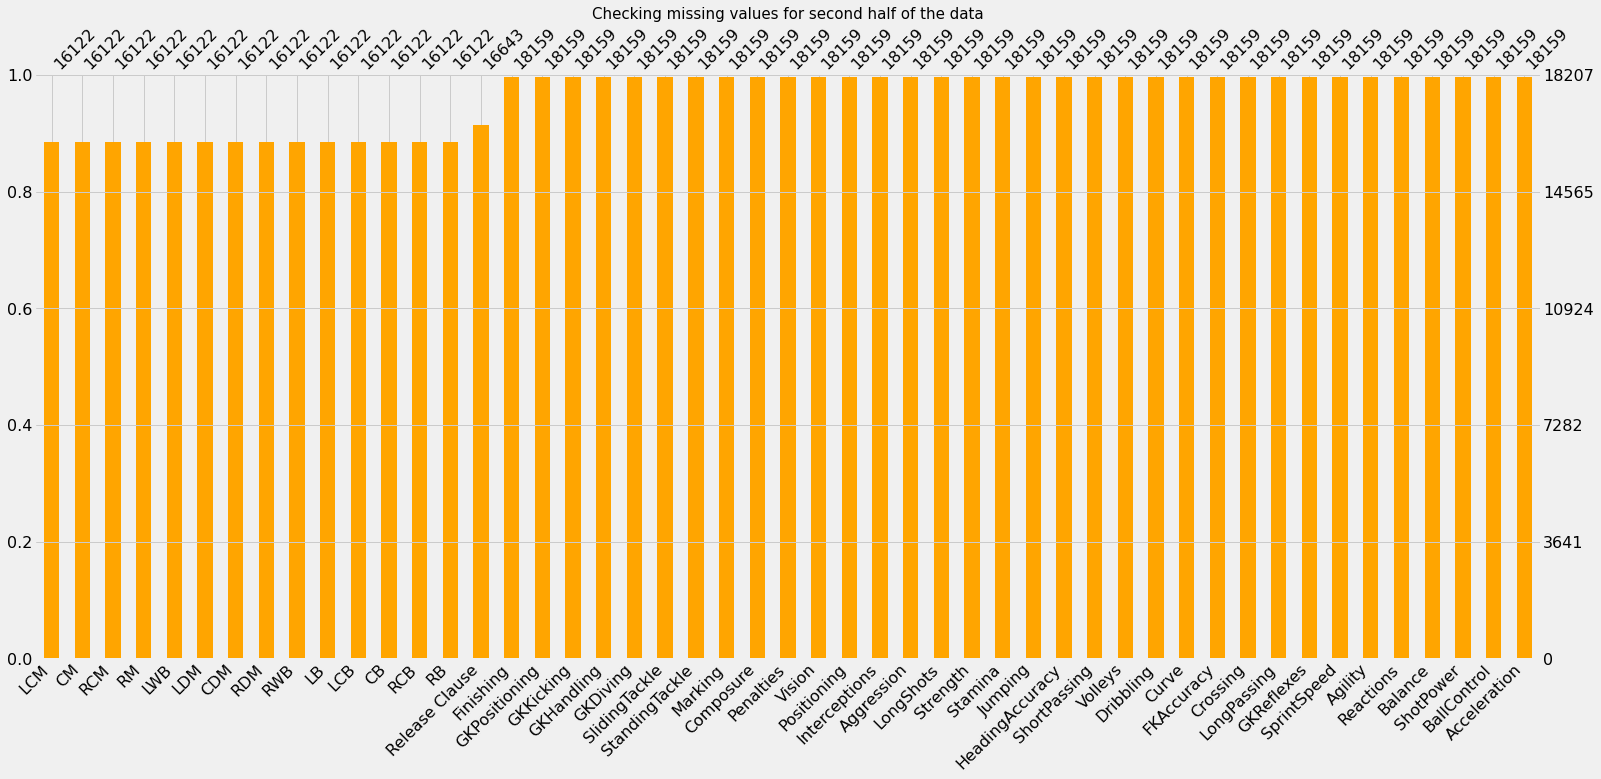

In [10]:
# visualize missing values
mno.bar(data.iloc[:,40:],color='orange',sort='ascending')
plt.title('Checking missing values for second half of the data', fontsize=15)
plt.show()

In [11]:
# filling the missing values for proper visualization
data['ShortPassing'].fillna(data['ShortPassing'].mean(),inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)
data.fillna(0,inplace = True)

In [12]:
# check whether data still has any missing values
data.isnull().sum().sum()

0

### Feature Engineering

In [13]:
# creating new features by aggregating the features
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression','Interceptions','Positioning',
                            'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [14]:
# adding these categories to data
data['defending'] = data.apply(defending,axis=1)
data['general'] = data.apply(general,axis=1)
data['mental']= data.apply(mental,axis=1)
data['passing']= data.apply(passing, axis=1)
data['mobility'] = data.apply(mobility,axis=1)
data['power'] = data.apply(power, axis=1)
data['rating'] = data.apply(rating,axis=1)
data['shooting'] = data.apply(shooting,axis=1)

In [15]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,defending,general,mental,passing,mobility,power,rating,shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",None,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",None,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",None,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",None,2020,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",None,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,59,79,81,92,81,76,92,85


### Data Visualization

<AxesSubplot:xlabel='shooting', ylabel='Density'>

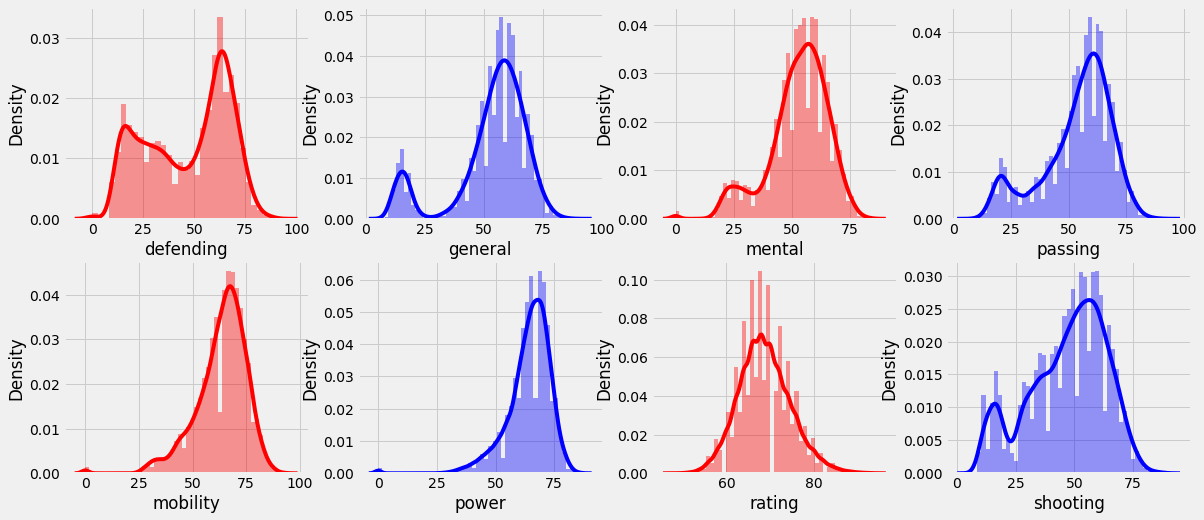

In [16]:
# Distribution of scores of different skills
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(2,4,1)
sns.distplot(data['defending'], color='red')
plt.subplot(2,4,2)
sns.distplot(data['general'], color='blue')
plt.subplot(2,4,3)
sns.distplot(data['mental'], color='red')
plt.subplot(2,4,4)
sns.distplot(data['passing'], color='blue')
plt.subplot(2,4,5)
sns.distplot(data['mobility'], color='red')
plt.subplot(2,4,6)
sns.distplot(data['power'], color='blue')
plt.subplot(2,4,7)
sns.distplot(data['rating'], color='red')
plt.subplot(2,4,8)
sns.distplot(data['shooting'], color='blue')

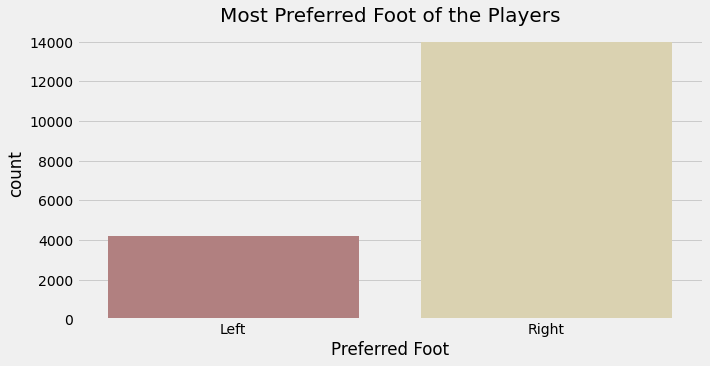

In [17]:
# comparison of preferred foot over different players
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

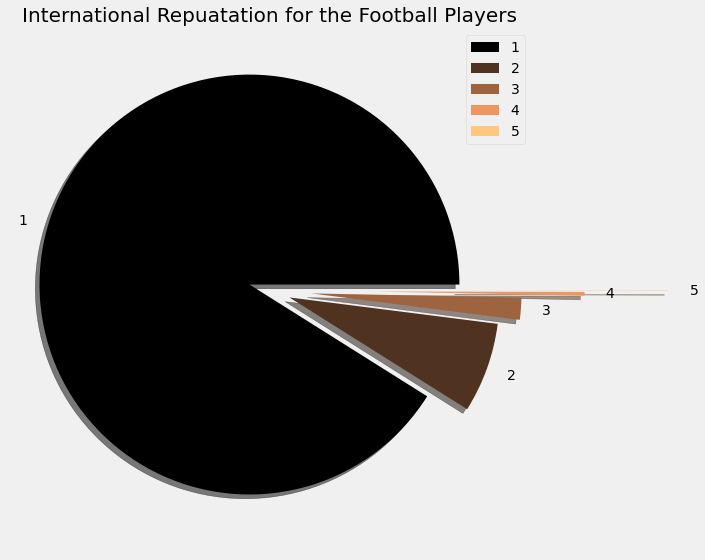

In [18]:
# pie chart to represent share of international reputation
labels = ['1','2','3','4','5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True)
plt.title('International Repuatation for the Football Players',fontsize=20)
plt.legend()
plt.show()

In [19]:
data[data['International Reputation']==5][['Name','Nationality','Overall']].sort_values(
by='Overall',ascending=False).style.background_gradient(cmap='magma')

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


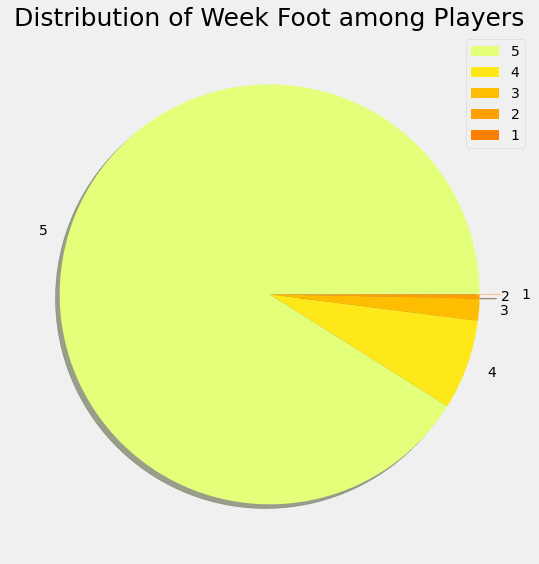

In [20]:
# pie chart to represent share of week foot players
labels = ['5','4','3','2','1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0,0,0,0.1]
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True)
plt.title('Distribution of Week Foot among Players',fontsize=25)
plt.legend()
plt.show()

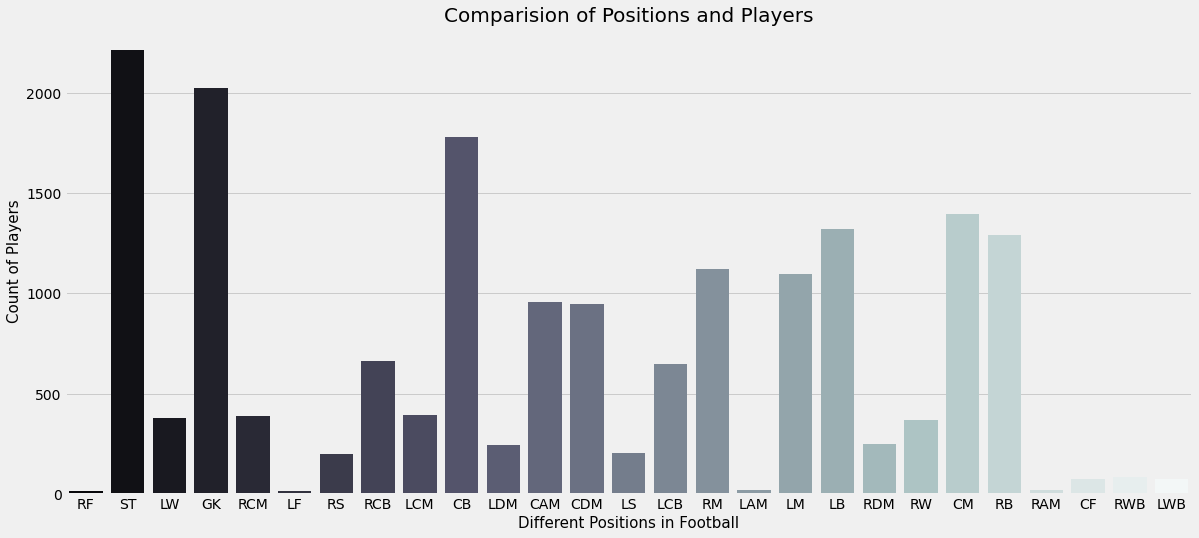

In [21]:
# different positions acquired by players
plt.figure(figsize=(18,8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position',data=data,palette='bone')
ax.set_xlabel(xlabel='Different Positions in Football',fontsize=15)
ax.set_ylabel(ylabel='Count of Players',fontsize=15)
ax.set_title(label='Comparision of Positions and Players',fontsize=20)
plt.show()


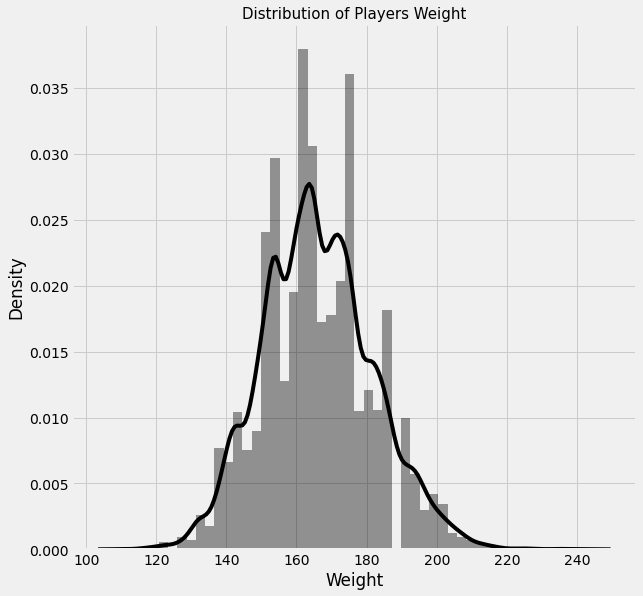

In [22]:
# function for cleaning the weight data
def extract_value_from(value):
    out = value.replace('lbs','')
    return float(out)
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))
sns.distplot(data['Weight'],color='black')
plt.title('Distribution of Players Weight',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Distribution of Wages of the Players')

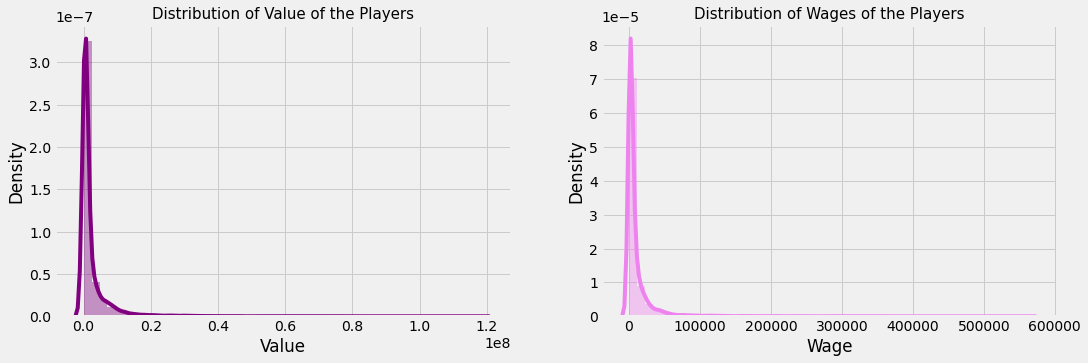

In [23]:
# function for cleaning the wage column
def extract_value_from(column):
    out = column.replace('€','') 
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in column:
        out = float(out.replace('K',''))*1000
    return float(out)

# applying the function to the wage column
data['Value'] = data['Value'].apply(lambda x : extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x : extract_value_from(x))

# comparing the players' Wages
plt.rcParams['figure.figsize'] = (16,5)
plt.subplot(1,2,1)
sns.distplot(data['Value'],color='purple')
plt.title('Distribution of Value of the Players',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(data['Wage'],color='violet')
plt.title('Distribution of Wages of the Players',fontsize=15)

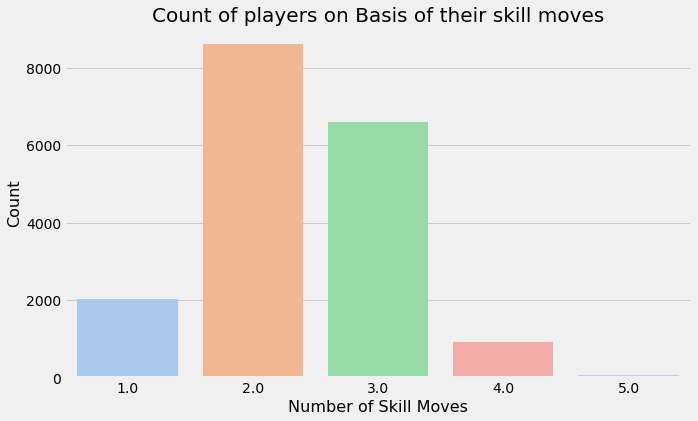

In [24]:
# Skill Moves of Players
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'Skill Moves', data=data,palette='pastel')
ax.set_title('Count of players on Basis of their skill moves',fontsize=20)
ax.set_xlabel(xlabel='Number of Skill Moves',fontsize=16)
ax.set_ylabel(ylabel='Count',fontsize=16)
plt.show()

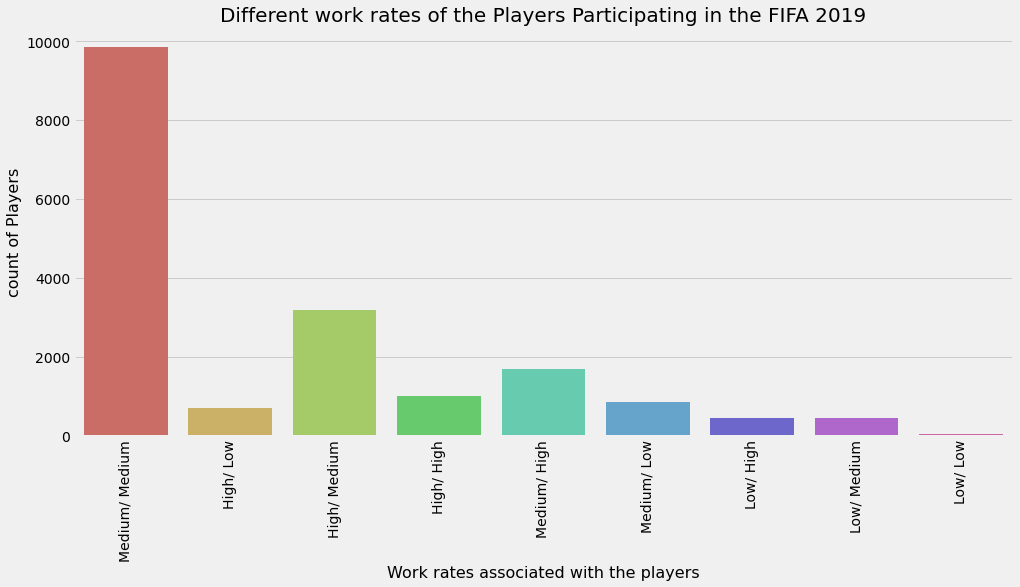

In [25]:
# Different work rate of the players
plt.figure(figsize = (15, 7))
plt.style.use('fivethirtyeight')
sns.countplot(x='Work Rate',data=data,palette='hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019',fontsize=20)
plt.xlabel('Work rates associated with the players',fontsize=16)
plt.ylabel('count of Players',fontsize=16)
plt.xticks(rotation=90)
plt.show()

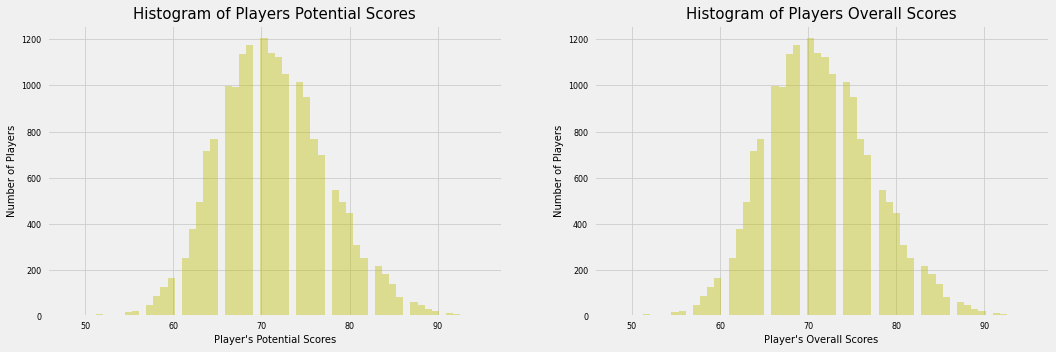

In [26]:
# Different potential scores and Overall scores of the player
plt.figure(figsize=(16,5))
plt.style.use('seaborn-paper')
plt.subplot(1,2,1)
x=data.Potential
ax=sns.distplot(x,bins=58,kde=False,color='y')
ax.set_xlabel(xlabel="Player's Potential Scores",fontsize=10)
ax.set_ylabel(ylabel = "Number of Players",fontsize=10)
ax.set_title('Histogram of Players Potential Scores',fontsize=15)
plt.subplot(1,2,2)
y=data.Overall
ax=sns.distplot(x,bins=58,kde=False,color='y')
ax.set_xlabel(xlabel="Player's Overall Scores",fontsize=10)
ax.set_ylabel(ylabel = "Number of Players",fontsize=10)
ax.set_title('Histogram of Players Overall Scores',fontsize=15)
plt.show()

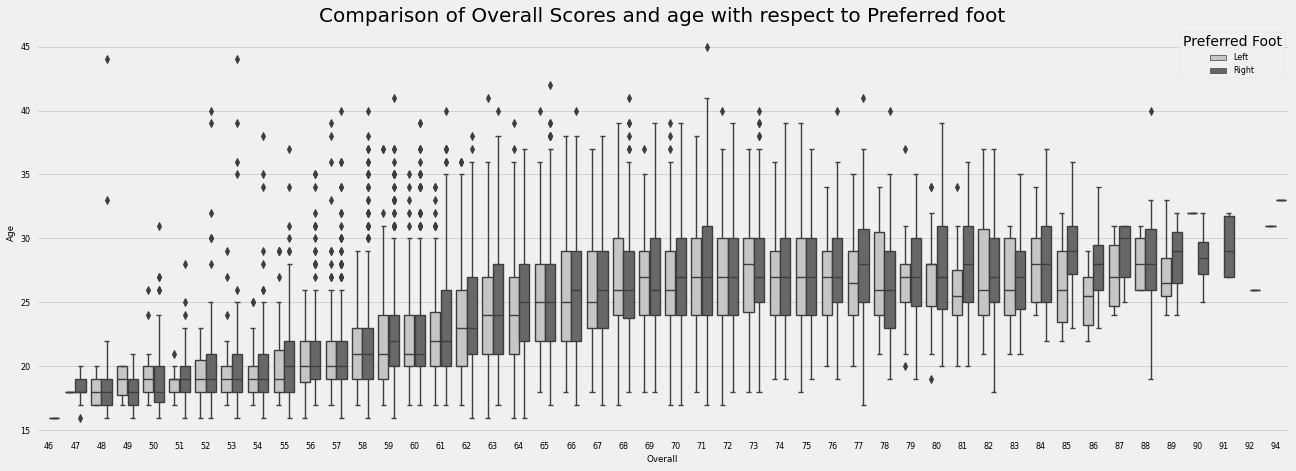

In [27]:
# violin plot
plt.rcParams['figure.figsize']=(20,7)
plt.style.use('seaborn-dark-palette')
sns.boxplot(data['Overall'],data['Age'],hue=data['Preferred Foot'],palette='Greys')
plt.title('Comparison of Overall Scores and age with respect to Preferred foot',fontsize=20)
plt.show()

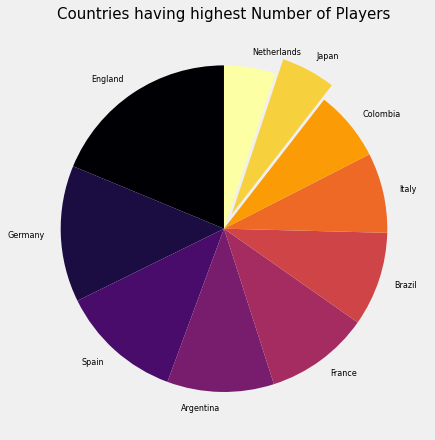

In [28]:
# Countries with highest number of players
data['Nationality'].value_counts().head(10).plot(kind='pie',cmap='inferno',
                                               startangle=90,explode=[0,0,0,0,0,0,0,0,0.1,0])
plt.title('Countries having highest Number of Players',fontsize=15)
plt.axis('off')
plt.show()

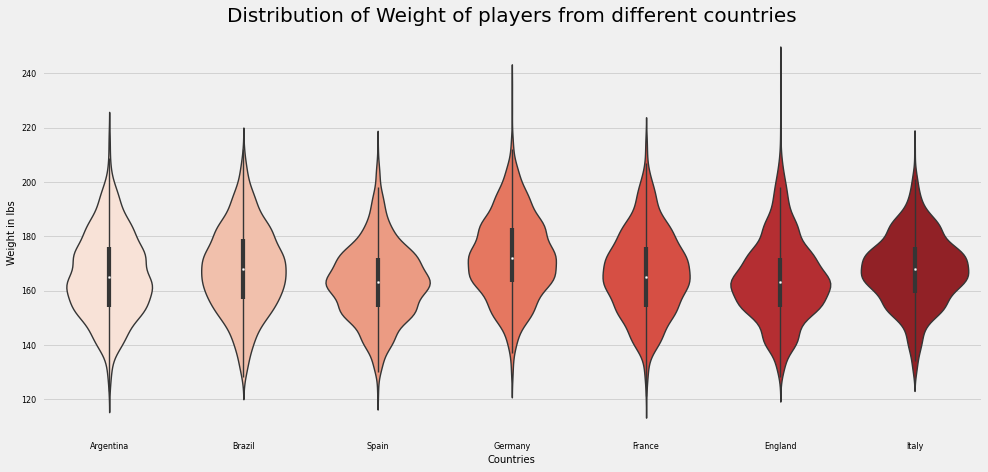

In [29]:
# Distribution of weight of Nations' Player
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)&data['Weight']]
plt.rcParams['figure.figsize']=(15,7)
ax=sns.violinplot(x=data_countries['Nationality'],y=data_countries['Weight'],palette='Reds')
ax.set_xlabel(xlabel="Countries",fontsize=10)
ax.set_ylabel(ylabel = "Weight in lbs",fontsize=10)
ax.set_title('Distribution of Weight of players from different countries',fontsize=20)
plt.show()

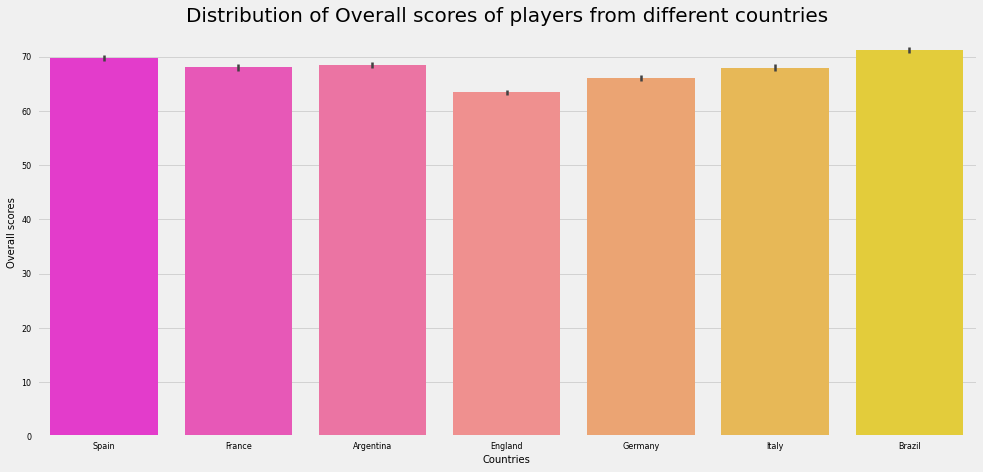

In [30]:
# Every Nations' Player and their overall scores
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)&data['Overall']]
plt.rcParams['figure.figsize']=(15,7)
ax=sns.barplot(x=data_countries['Nationality'],y=data_countries['Overall'],palette='spring')
ax.set_xlabel(xlabel="Countries",fontsize=10)
ax.set_ylabel(ylabel = "Overall scores",fontsize=10)
ax.set_title('Distribution of Overall scores of players from different countries',fontsize=20)
plt.show()

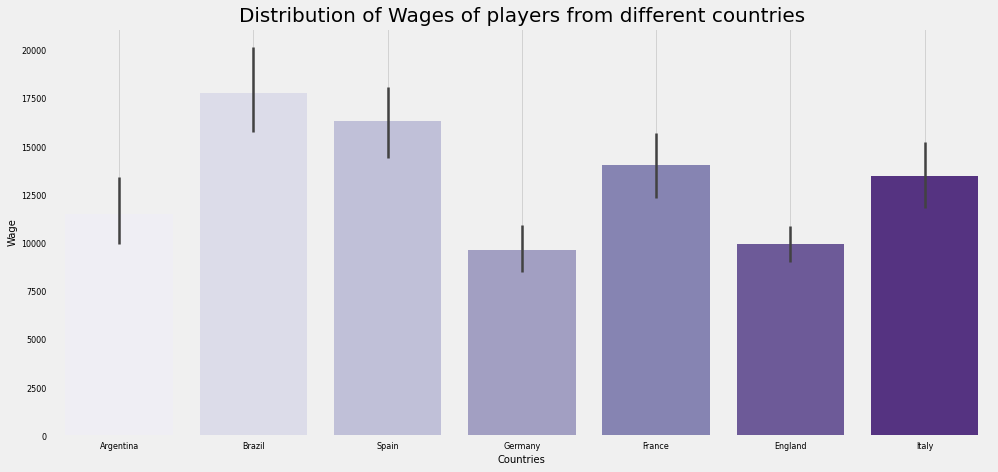

In [31]:
# Every Nations' Player and their wages
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)&data['Wage']]
plt.rcParams['figure.figsize']=(15,7)
ax=sns.barplot(x=data_countries['Nationality'],y=data_countries['Wage'],palette='Purples')
ax.set_xlabel(xlabel="Countries",fontsize=10)
ax.set_ylabel(ylabel = "Wage",fontsize=10)
ax.set_title('Distribution of Wages of players from different countries',fontsize=20)
plt.grid()
plt.show()

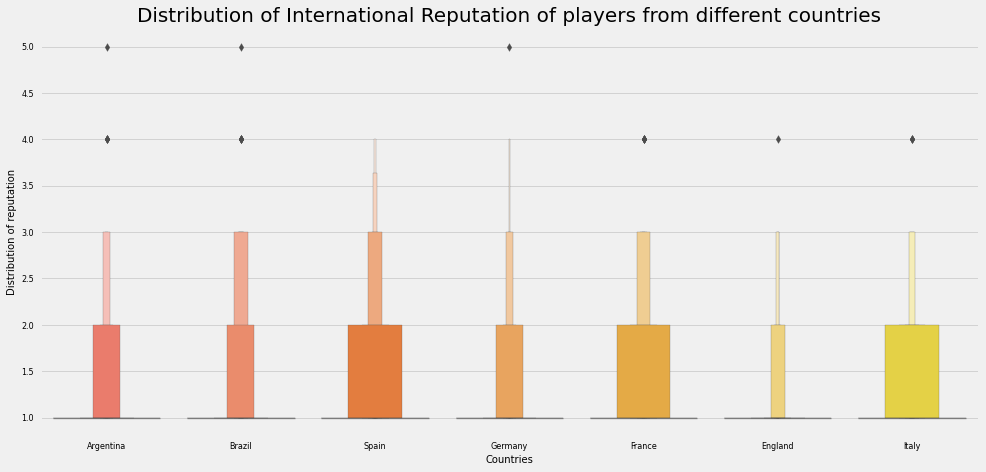

In [32]:
# Every Nations' Player and their International Reputation
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)&data['International Reputation']]
plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxenplot(x=data_countries['Nationality'],y=data_countries['International Reputation'],palette='autumn')
ax.set_xlabel(xlabel="Countries",fontsize=10)
ax.set_ylabel(ylabel = "Distribution of reputation",fontsize=10)
ax.set_title('Distribution of International Reputation of players from different countries',fontsize=20)
plt.show()

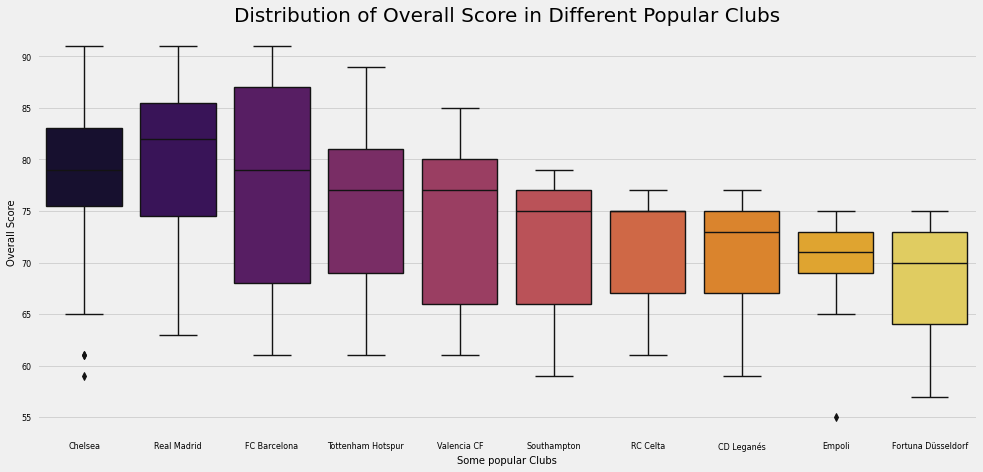

In [33]:
# Distribution of Overall score in some Popular clubs
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
              'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_clubs = data.loc[data['Club'].isin(some_clubs)&data['Overall']]
plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxplot(x=data_clubs['Club'],y=data_clubs['Overall'],palette='inferno')
ax.set_xlabel(xlabel="Some popular Clubs",fontsize=10)
ax.set_ylabel(ylabel = "Overall Score",fontsize=10)
ax.set_title('Distribution of Overall Score in Different Popular Clubs',fontsize=20)
plt.show()

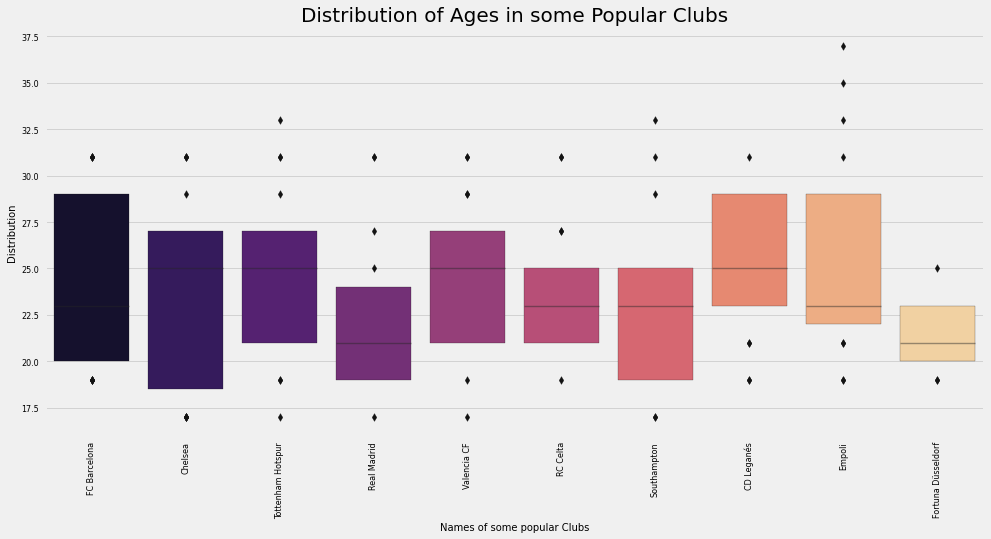

In [34]:
# Distribution of Ages in some Popular clubs
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_club = data.loc[data['Club'].isin(some_clubs)&data['Age']]
plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxenplot(x='Club',y='Age',data=data_club,palette='magma')
ax.set_xlabel(xlabel="Names of some popular Clubs",fontsize=10)
ax.set_ylabel(ylabel = "Distribution",fontsize=10)
ax.set_title('Distribution of Ages in some Popular Clubs',fontsize=20)
plt.xticks(rotation=90)
plt.show()

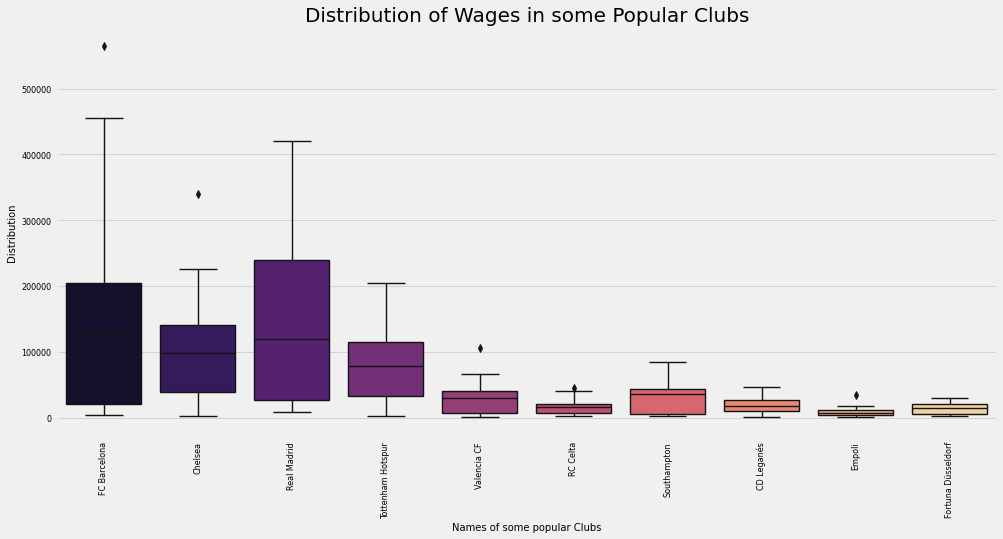

In [35]:
# Distribution of Wages in some Popular clubs
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_club = data.loc[data['Club'].isin(some_clubs)&data['Wage']]
plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxplot(x='Club',y='Wage',data=data_club,palette='magma')
ax.set_xlabel(xlabel="Names of some popular Clubs",fontsize=10)
ax.set_ylabel(ylabel = "Distribution",fontsize=10)
ax.set_title('Distribution of Wages in some Popular Clubs',fontsize=20)
plt.xticks(rotation=90)
plt.show()

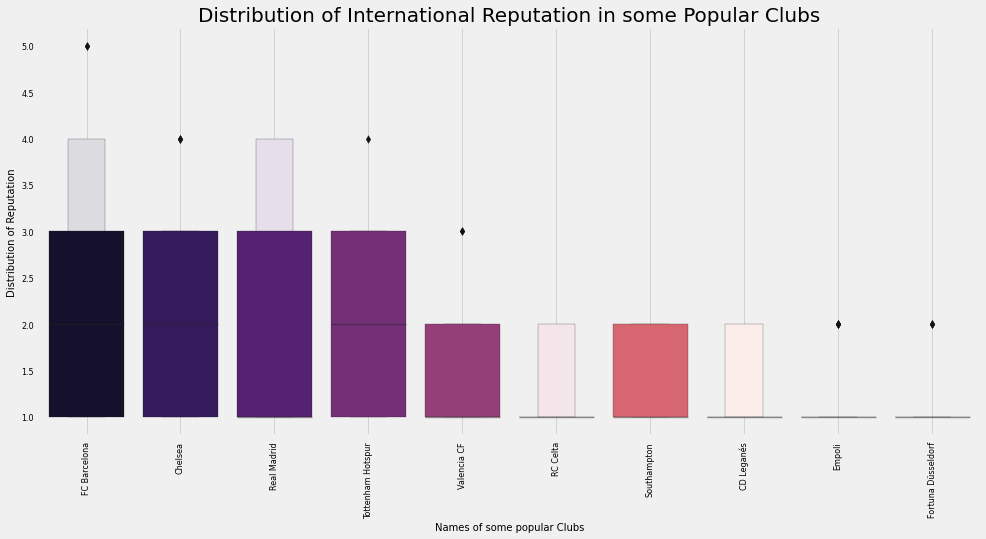

In [36]:
# Distribution of International Reputation in some Popular clubs
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_club = data.loc[data['Club'].isin(some_clubs)&data['International Reputation']]
plt.rcParams['figure.figsize']=(15,7)
ax=sns.boxenplot(x='Club',y='International Reputation',data=data_club,palette='magma')
ax.set_xlabel(xlabel="Names of some popular Clubs",fontsize=10)
ax.set_ylabel(ylabel = "Distribution of Reputation",fontsize=10)
ax.set_title('Distribution of International Reputation in some Popular Clubs',fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

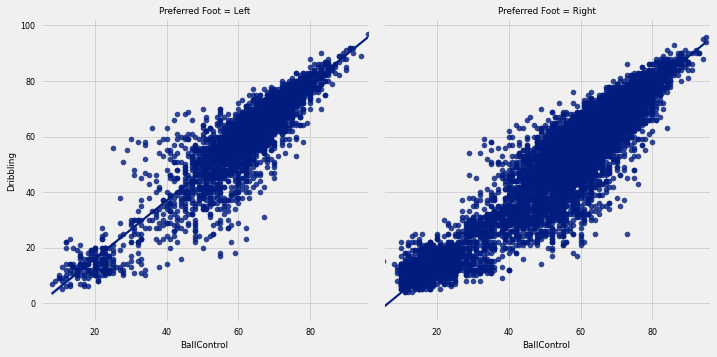

In [37]:
# comparing the performance of left-footed and right-footed footballers
sns.lmplot(x='BallControl',y='Dribbling',data=data,col='Preferred Foot')
plt.show()

### Query Analysis

In [38]:
# Interactive function to analyze the skills of players
@interact
def skill(skills=['defending','general','mental','passing',
                'mobility','power','rating','shooting'],score=75):
    return data[data[skills]>score][['Name','Nationality','Club','Overall',skills]].sort_values(by=skills,
                                                                                               ascending=False).head(20).style.background_gradient(cmap='Blues')

interactive(children=(Dropdown(description='skills', options=('defending', 'general', 'mental', 'passing', 'mo…

In [39]:
# Interactive function for getting a report of players country wise
# List of top 15 players from each country
@interact
def country(country=list(data['Nationality'].value_counts().index)):
    return data[data['Nationality']==country][['Name','Position','Overall','Potential']].sort_values(by='Overall',
                                                                                               ascending=False).head(15).style.background_gradient(cmap='magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [40]:
# Interactive function to get list of top 15 players from each club
@interact
def club(club=list(data['Club'].value_counts().index[1:])):
    return data[data['Club']==club][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage','Value',
                                              'Contract Valid Until']].sort_values(by='Overall',
                                                                                               ascending=False).head(15).style.background_gradient(cmap='inferno')

interactive(children=(Dropdown(description='club', options=('Newcastle United', 'Everton', 'Chelsea', 'AS Mona…

In [41]:
# youngest players from the dataset
youngest = data[data['Age']==16][['Name','Age','Club','Nationality','Overall']]
youngest.sort_values(by='Overall',ascending=False).head().style.background_gradient(cmap='magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


In [42]:
# 15 eldest players from the dataset
data.sort_values('Age',ascending=False)[['Name','Age','Club','Nationality','Overall']].head(15).style.background_gradient(cmap='Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [43]:
# Longest membership in the club
now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient(cmap='Reds')

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,29
M. Al Shalhoub,Al Hilal,22
H. Sogahata,Kashima Antlers,22
M. Ogasawara,Kashima Antlers,22
S. Narazaki,Nagoya Grampus,21
M. Wölfli,BSC Young Boys,20
K. Kitamoto,Vissel Kobe,20
C. Källqvist,BK Häcken,19
Y. Endo,Gamba Osaka,19


In [44]:
@interact
def check(column='Years_of_member',
         club=['FC Barcelona','Real Madrid','Chelsea'],membership=4):
    return data[(data[column]>membership)&(data['Club']==club)][['Name','Club','Years_of_member']].sort_values(by='Years_of_member',
                                                                                                              ascending=False).style.background_gradient(cmap='magma')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

In [45]:
# Top ten left footed footballers
data[data['Preferred Foot']=='Left'][['Name','Age','Club',
                                     'Nationality','Overall']].sort_values(by='Overall',
                                                                           ascending=False).head(10).style.background_gradient(cmap='bone')
                        

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


In [46]:
# Top ten right footed footballers
data[data['Preferred Foot']=='Right'][['Name','Age','Club',
                                     'Nationality','Overall']].sort_values(by='Overall',
                                                                           ascending=False).head(10).style.background_gradient(cmap='bone')
                        

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90
